# Scikit Workflow Introduction

### Loading the data

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
data = mnist.data[0:10000]
target= mnist.target[0:10000]
print "Shape of Data: ", data.shape
print "Shape of Target", target.shape

Shape of Data:  (10000, 784)
Shape of Target (10000,)


We split the data into training and testing. Do not touch the test data until you're ready to make a submission on Kaggle.

In [2]:
from sklearn.cross_validation import train_test_split

In [3]:
X,  kaggle_x, Y, kaggle_y = train_test_split(data, target, 
                                                    train_size= 0.8)

In Kaggle competitions,  you will not have access to the targets of the test set(kaggle_y in this case)

### Exploring and Visualizing the data

In [4]:
sample = data[0]
print "Sample shape: ", sample.shape

Sample shape:  (784,)


Each vector is created by flattening a $28 \times  28$ matrix. To visualize the images, we can reshape the array into the original matrix shape and visualize it.

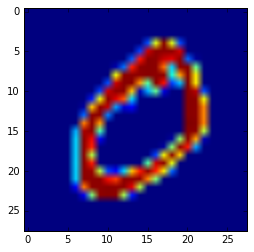

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

sample = sample.reshape(28,28)
plt.imshow(sample)
plt.show()

### Evaluating Models and Cross-Validation

Let's test the performance of the 2 different classifiers in scikit. We do this by using the cross validation score function inbuilt in scikit.

In [6]:
from sklearn.cross_validation import cross_val_score

#### 1. K-Nearest Neighbours

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knnmodel = KNeighborsClassifier()
knncvscore = cross_val_score(model, 
                          X, Y, scoring='accuracy', n_jobs=-1)


In [32]:
print "Knn CV Score is: ", knncvscore

Knn CV Score is:  [ 0.99850019  0.99850019  0.99924981]


#### 2. Support Vector Machines

In [33]:
from sklearn.svm import SVC

In [39]:
svcmodel = SVC()
svccvscore = cross_val_score(svcmodel, 
                          X,Y, scoring='accuracy', n_jobs =-1)

In [40]:
print "SVC CV Score is: ", svccvscore

SVC CV Score is:  [ 0.59130109  0.59130109  0.59152288]


#### 3.  Gradient Boosting Machines

In [36]:
from xgboost import XGBClassifier

In [37]:
xgbmodel= XGBClassifier()
xgbcvscore = cross_val_score(svcmodel, 
                          X,Y, scoring='accuracy', n_jobs =-1)

In [38]:
print "Gradient Boosting CV Score is: ", xgbcvscore

Gradient Boosting CV Score is:  [ 0.99775028  0.99700037  0.99737434]


### Fitting the model on the Entire Training Set

The model is fit on the entire  training set and then used to make predictions.

In [25]:
finalmodel = knnmodel
finalmodel.fit(X,Y)
predictions = finalmodel.predict(kaggle_x)

### Getting the final Score from Kaggle

The final score from Kaggle is one that you get from your predictions against the test set(kaggle_x). It is verfied against the target to provide your leaderboard score. If you are not overfitting, your cross validation score and leaderboard score should be almost identical.

In [20]:
from sklearn.metrics import accuracy_score
accscore = accuracy_score(predictions, kaggle_y)

In [21]:
print "The accuracy score is", accscore

0.9995
